In [85]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from Tree import Tree
import matplotlib.pyplot as plt

In [69]:
df = pd.read_csv('cameras.csv')
df.dropna(inplace=True) # dropping only 2 rows
df.drop(df[df['Low resolution'] == 0.0].index, inplace=True) # dropping 50 rows
df.drop(df[df['Weight (inc. batteries)'] == 0.0].index, inplace=True) # dropping 19 rows
df.drop(df[df['Dimensions'] == 0.0].index, inplace=True) # dropping 3 rows
df.drop('Model', axis=1, inplace=True)
df.head()

,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
4,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0
5,2001,1600.0,640.0,1.0,51.0,51.0,50.0,20.0,8.0,270.0,119.0,179.0
8,1996,832.0,640.0,0.0,50.0,50.0,40.0,10.0,1.0,460.0,160.0,139.0


In [70]:
train = df.sample(frac=0.8)
test  = df.drop(train.index)
X_train = train.drop('Price', axis=1)
X_test  =  test.drop('Price', axis=1)
Y_train = train.Price
Y_test  =  test.Price 

In [81]:
tree = DecisionTreeRegressor(min_samples_leaf=12)
tree.fit(X_train, Y_train)
tree.score(X_test, Y_test)

0.6337291520174064

In [82]:
Y_predict = tree.predict(X_test)
residuals = Y_predict-Y_test
mean_error = residuals.abs().mean()

In [86]:
tree.score(X_train, Y_train)

0.6459765251724436

In [83]:
mean_error

224.828985464704

(array([832.,  66.,  47.,   1.,   0.,   9.,   3.,   0.,   0.,   3.]),
 array([  14. ,  812.5, 1611. , 2409.5, 3208. , 4006.5, 4805. , 5603.5,
        6402. , 7200.5, 7999. ]),
 <a list of 10 Patch objects>)

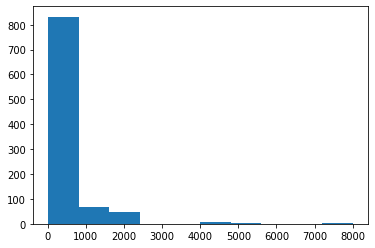

In [84]:
plt.hist(df.Price)

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)
model.score(X_test, Y_test)